## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [41]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image
## Module filters from skimage 
from skimage import filters
from skimage import data
from skimage.transform import pyramid_gaussian
from skimage import util


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [42]:
imagelocation = 'images/lena-grey.bmp'
lena_im = io.imread(imagelocation)

/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

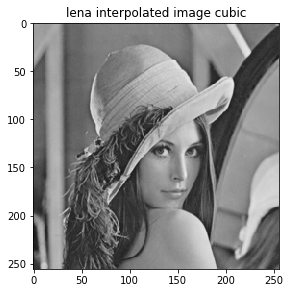

In [43]:
lena_cu = misc.imresize(lena_im, 50, 'cubic')
io.imshow(lena_cu)
plt.title('lena interpolated image cubic')
plt.show

/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

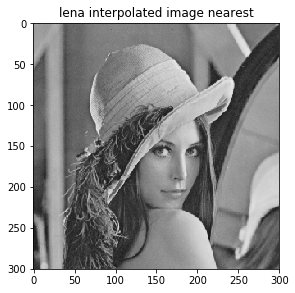

In [44]:
lena_ne = misc.imresize(lena_im, (300, 300), 'nearest')
io.imshow(lena_ne)
plt.title('lena interpolated image nearest')
plt.show

/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

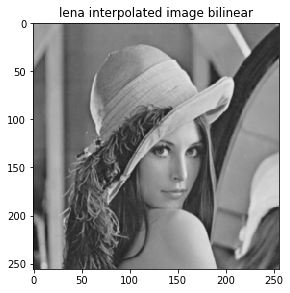

In [45]:
lena_bi = misc.imresize(lena_im, 50 , 'bilinear')
io.imshow(lena_bi)
plt.title('lena interpolated image bilinear')
plt.show


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [46]:
def simple_blend(apple1, orange1):
    l,b = orange1.shape
    result = np.zeros((l,b))
    for i in range(l):
        for j in range(b):
            if(j>b/2):
                result[i][j]=orange1[i][j]
            else:
                result[i][j]=apple1[i][j]
    return result.astype('uint8')

In [47]:
orange = 'images/orange.jpeg'
apple = 'images/apple.jpeg'
orange1 = io.imread(orange,as_gray = True)
apple1 = io.imread(apple,as_gray = True)
l = input('enter the desired length: ')
b = input('Enter the desired bredth: ')
apple1_n = misc.imresize(apple1, (int(l), int(b)), interp='cubic')
orange1_n = misc.imresize(orange1, (int(l), int(b)), interp='cubic')
result = simple_blend(apple1_n, orange1_n)

enter the desired length: 300
Enter the desired bredth: 300


/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


ValueError: too many values to unpack (expected 2)

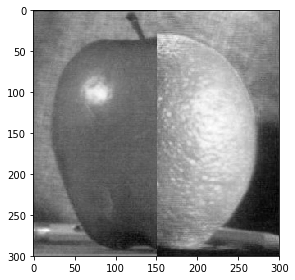

In [48]:
io.imshow(result) 

In [49]:
def alpha_blend(apple1, orange1, w, a):
    l,b,h = apple1.shape
    result = np.zeros((apple1.shape))
    result[:][:int(w[0])][:] = apple1[:][:int(w[0])][:]
    result[:][int(w[1]):][:] = orange1[:][int(w[1]):][:]
    result[:][int((int(w[0])+int(w[1]))/2)][:] = .5*apple1[:][int((int(w[0])+int(w[1]))/2)][:] + .5*orange1[:][int((int(w[0])+int(w[1]))/2)][:]
    k = np.arange(0,a,2*a/(w[1]-w[0]))
    for i in range(int(np.ceil(np.arange(0,a,2*a/(w[1]-w[0])).shape[0]))):
        result[:][int(w[0]) + i][:] = k[i]*orange1[:][int(w[0]) + i][:] + (1.0-k[i])*apple1[:][int(w[0]) + i][:]
        result[:][int(w[1]) - i][:] = k[i]*apple1[:][int(w[1]) - i][:] + (1.0-k[i])*orange1[:][int(w[1]) - i][:]

    return result.astype('uint8')


In [50]:
#Not to be used or RUN
def alpha(im1, im2, win):
    blend_im[:,:np.ceil(col/2)-win] = im1[:, :np.ceil(col/2)-win]
    blend_im[:,:np.ceil(col/2)+win:] = im1[:, :np.ceil(col/2)+win:]
    
    x1 = np.ceil(col/2)-win
    x2 = np.ceil(col/2)+win
    x  = np.arrange(x1,x2)
    alpha = x/(x1-x2) -x/(x1-x2);
    blend_im[:, x1:x2] = alpha*im1[:,x1:x2] + (1-alpha)*im2[:,x1:x2]
    return blend_im.astype('uint8')


Enter the value of window starting: 100
Enter the value of window ending: 200
Enter the value of alpha (<1): .5


/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.
/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


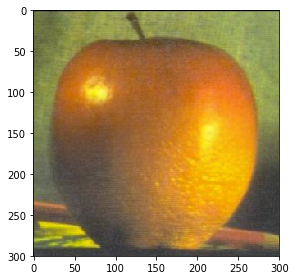

In [51]:
image1 = io.imread('./images/apple.jpeg')
image2 = io.imread('./images/orange.jpeg')
if(image1.shape != image2.shape):
    l = input('enter the desired length: ')
    b = input('Enter the desired bredth: ')
w = np.zeros((2,1))
w[0] = int(input('Enter the value of window starting: '))
w[1] = int(input('Enter the value of window ending: '))
a = float(input('Enter the value of alpha (<1): '))
image1_n = misc.imresize(image1, (int(l), int(b)), interp='cubic')
image2_n = misc.imresize(image2, (int(l), int(b)), interp='cubic')
result_blend = alpha_blend(image1_n, image2_n, w.astype('int'), a)
io.imshow(result_blend)


In [52]:
def pyramid_blend(image1, image2):
    l,b = image1.shape
    r_1 = np.zeros((image1.shape))
    r_2 = np.zeros((image1.shape))
    
    #calculating Gaussian
    pyramid_1 = pyramid_gaussian(image1, max_layer=4)
    pyramid_2 = pyramid_gaussian(image2, max_layer=4)
    
    #Forming Laplacian Pyramid of Image 1:

    for i, e in reversed(list(enumerate(pyramid_1))):
        if(i==4):
            ln_1 = e
        else:
            if(i==0):
                r_ln = transform.pyramid_expand(ln_1, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                r_ln = img_as_ubyte(r_ln)
                r_1 = img_as_ubyte(e) + (r_ln)
                plt.show()
                plt.imshow(r_ln)
                plt.title('Laplacian Image 1')
            else:
                r_ln = transform.pyramid_expand(ln_1, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                ln_1 = (e - r_ln) 
     
    #Forming Laplacian Pyramid of Image 2:

    for i, e in reversed(list(enumerate(pyramid_2))):
        if(i==4):
            ln_2 = e
        else:
            if(i==0):
                r_ln = transform.pyramid_expand(ln_2, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                r_ln = img_as_ubyte(r_ln)
                plt.show()
                plt.imshow(r_ln)
                plt.title('Laplacian Image 2')
                r_2 = img_as_ubyte(e) + (r_ln)
            else:
                r_ln = transform.pyramid_expand(ln_2, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                ln_2 = (e - r_ln)
                
   #creating a region mask:
    mask = np.zeros(r_1.shape)
    a = np.linspace(0.0,1.0,int(b/2),endpoint=True)
    #print(a)
    mask[:,:int(b/2)] = 1.0-a
    mask[:,int(b/2)+1:] = 0.0
    
    #mask = filters.gaussian(mask)
    
    #result of two images:
    result = np.zeros(r_1.shape)
    result = r_1*mask  + r_2*(1-mask)
    plt.show()
    plt.imshow(result)
    return result.astype('uint8')

In [53]:
def pyramid_blend_color(image1, image2):
    l,b,h = image1.shape
    r_1 = np.zeros((image1.shape))
    r_2 = np.zeros((image1.shape))
    
    #calculating Gaussian
    pyramid_1 = pyramid_gaussian(image1, max_layer=4)
    pyramid_2 = pyramid_gaussian(image2, max_layer=4)
    
    #Forming Laplacian Pyramid of Image 1:

    for i, e in reversed(list(enumerate(pyramid_1))):
        if(i==4):
            ln_1 = e
        else:
            if(i==0):
                r_ln = transform.pyramid_expand(ln_1, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                r_ln = img_as_ubyte(r_ln)
                r_1 = img_as_ubyte(e) + (r_ln)
                plt.show()
                plt.imshow(r_ln)
                plt.title('Laplacian Image 1')
            else:
                r_ln = transform.pyramid_expand(ln_1, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                ln_1 = (e - r_ln) 
     
    #Forming Laplacian Pyramid of Image 2:

    for i, e in reversed(list(enumerate(pyramid_2))):
        if(i==4):
            ln_2 = e
        else:
            if(i==0):
                r_ln = transform.pyramid_expand(ln_2, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                r_ln = img_as_ubyte(r_ln)
                plt.show()
                plt.imshow(r_ln)
                plt.title('Laplacian Image 2')
                r_2 = img_as_ubyte(e) + (r_ln)
            else:
                r_ln = transform.pyramid_expand(ln_2, upscale=2)
                r_ln = transform.resize(r_ln, e.shape)
                ln_2 = (e - r_ln)
                
   #creating a region mask:
    mask = np.zeros(r_1.shape)
    print(r_1.shape)
    a = np.linspace(0.0,1.0,int(b/2),endpoint=True)
    #print(a)
    mask[:,:int(b/2),1] = 1.0-a
    mask[:,:int(b/2),2] = 1.0-a
    mask[:,:int(b/2),0] = 1.0-a
    mask[:,int(b/2)+1:,:] = 0.0
    
    #mask = filters.gaussian(mask)
    
    #result of two images:
    result = np.zeros(r_1.shape)
    result = r_1*mask  + r_2*(1-mask)
    return result.astype('uint8')



In [54]:
pyramid_1 = pyramid_gaussian(image1, max_layer=4)
for i, e in reversed(list(enumerate(pyramid_1))):
    if(i==4):
        ln = e
    else:
        if(i==0):
            print('no')
        else:
        #r_ln = transform.pyramid_expand(ln, max_layer=1, upscale=2)
            print(e.shape)


(38, 38, 3)
(75, 75, 3)
(150, 150, 3)
no


enter the desired length: 250
Enter the desired bredth: 250


/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/bhargav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys
/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


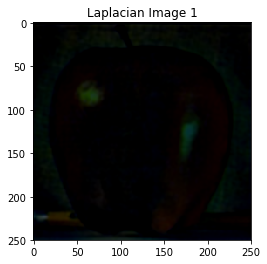

(250, 250, 3)


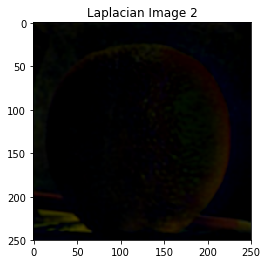

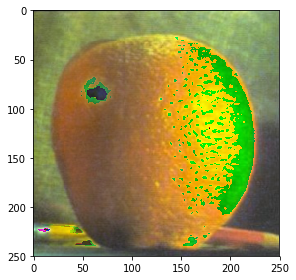

In [57]:
image1 = io.imread('./images/apple.jpeg')
image2 = io.imread('./images/orange.jpeg')
#if(image1.shape != image2.shape):
l = input('enter the desired length: ')
b = input('Enter the desired bredth: ')
image1_n = misc.imresize(image1, (int(l), int(b)), interp='cubic')
image2_n = misc.imresize(image2, (int(l), int(b)), interp='cubic')
r = pyramid_blend_color(image1_n, image2_n)
plt.show()
io.imshow(r)

/home/bhargav/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


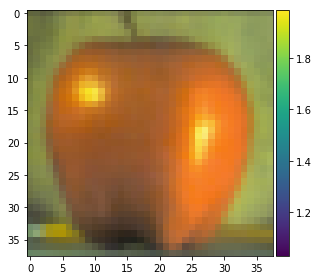

3
38


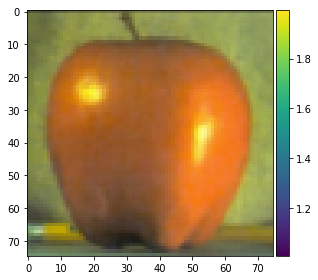

2
75


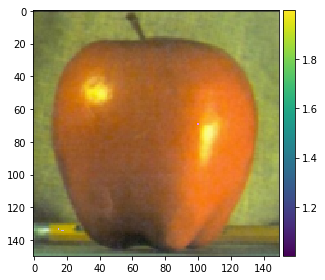

1
150


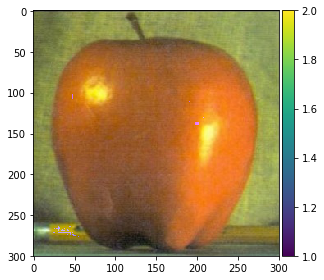

0
300


In [58]:
pyramid = pyramid_gaussian(image1, max_layer=4)
for i, v in reversed(list(enumerate(pyramid))):
    if(i < 4):
        
        #j = (next(t))
        io.imshow(v+1)
        plt.show()
        print(i)
        print(v.shape[0])